In [86]:
import yfinance as yf
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



In [87]:
adani = yf.Ticker("ADANIENT.NS")

In [115]:
recent_data = yf.download("ATGL.NS", period="16y")


[*********************100%%**********************]  1 of 1 completed


In [89]:
print(recent_data.columns)
recent_data.drop('Adj Close', axis=1, inplace=True)
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


[*********************100%%**********************]  1 of 1 completed


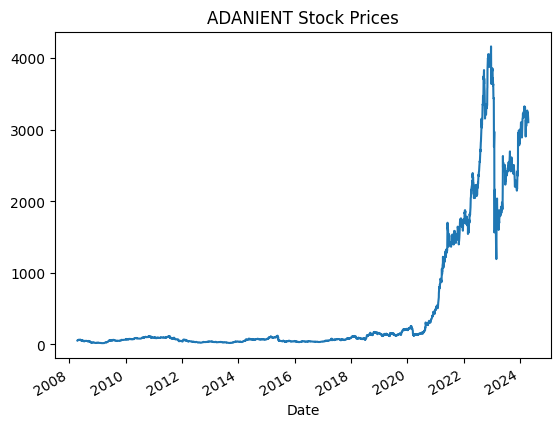

In [90]:
import matplotlib.pyplot as plt

data = yf.download("ADANIENT.NS", period='16y')
data['Close'].plot()
plt.title("ADANIENT Stock Prices")
plt.show()

# important

In [91]:
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [92]:
print(recent_data)


                   Open         High          Low        Close   Volume
Date                                                                   
2018-06-18    30.000000    31.500000    28.500000    31.500000  7006229
2018-06-19    32.700001    33.049999    31.000000    32.599998  2895692
2018-06-20    31.500000    32.200001    31.000000    31.000000  1115553
2018-06-21    29.450001    30.000000    29.450001    29.650000  2854524
2018-06-22    28.200001    29.799999    28.200001    29.450001  1612972
...                 ...          ...          ...          ...      ...
2024-04-09  1930.400024  1945.000000  1908.949951  1916.199951   294088
2024-04-10  1920.050049  1924.150024  1895.000000  1907.500000   301534
2024-04-12  1907.900024  1925.000000  1880.000000  1884.050049   393681
2024-04-15  1801.000000  1850.000000  1800.000000  1815.099976   978516
2024-04-16  1803.000000  1838.099976  1802.199951  1811.650024   495006

[1438 rows x 5 columns]


In [93]:
import pandas as pd
import numpy as np

# Assume 'stock_data' DataFrame contains open, high, low, close, and volume prices

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term EMAs
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    macd_line = short_ema - long_ema

    # Calculate signal line
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    stochastic_k = ((data['Close'] - low_min) / (high_max - low_min)) * 100
    stochastic_d = stochastic_k.rolling(window=3).mean()  # 3-day smoothing for %D line
    return stochastic_k, stochastic_d

def calculate_moving_averages(data, short_window=50, long_window=200):
    # Calculate short-term and long-term moving averages
    short_ma = data['Close'].rolling(window=short_window).mean()
    long_ma = data['Close'].rolling(window=long_window).mean()
    return short_ma, long_ma

def calculate_volume_indicators(data, window=20):
    # Calculate volume moving average
    volume_ma = data['Volume'].rolling(window=window).mean()
    # Calculate volume rate of change
    volume_roc = data['Volume'].pct_change(window)
    return volume_ma, volume_roc

def calculate_volatility_indicators(data, window=20):
    # Calculate Bollinger Bands
    std_dev = data['Close'].rolling(window=window).std()
    upper_band = data['Close'] + 2 * std_dev
    lower_band = data['Close'] - 2 * std_dev
    # Calculate Average True Range (ATR)
    high_low_range = data['High'] - data['Low']
    true_range = np.maximum(np.maximum((data['High'] - data['Low']).abs(), (data['High'] - data['Close'].shift()).abs()), (data['Low'] - data['Close'].shift()).abs())
    atr = true_range.rolling(window=window).mean()
    return upper_band, lower_band, atr

def williams_percent_r(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    # Calculate %R
    lowest_low = low.rolling(window=period).min()
    highest_high = high.rolling(window=period).max()
    percent_r = -100 * (highest_high - close) / (highest_high - lowest_low)

    return percent_r

# Calculate technical indicators
macd_line, signal_line, macd_histogram = calculate_macd(recent_data)
rsi = calculate_rsi(recent_data)
stochastic_k, stochastic_d = calculate_stochastic_oscillator(recent_data)
short_ma, long_ma = calculate_moving_averages(recent_data)
volume_ma, volume_roc = calculate_volume_indicators(recent_data)
upper_band, lower_band, atr = calculate_volatility_indicators(recent_data)

# Add calculated indicators to the DataFrame
recent_data['MACD_Line'] = macd_line
recent_data['Signal_Line'] = signal_line
recent_data['MACD_Histogram'] = macd_histogram
recent_data['RSI'] = rsi
recent_data['%K'] = stochastic_k
recent_data['%D'] = stochastic_d
recent_data['Short_MA'] = short_ma
recent_data['Long_MA'] = long_ma
recent_data['Volume_MA'] = volume_ma
recent_data['Volume_ROC'] = volume_roc
recent_data['Upper_Band'] = upper_band
recent_data['Lower_Band'] = lower_band
recent_data['ATR'] = atr
recent_data['%R']=williams_percent_r(recent_data)

# Print the DataFrame with calculated indicators
print(recent_data.shape[0])


1438


In [94]:
# Assuming your DataFrame is named 'df'
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


Percentage of NaN values in each column:
Open               0.000000
High               0.000000
Low                0.000000
Close              0.000000
Volume             0.000000
MACD_Line          0.000000
Signal_Line        0.000000
MACD_Histogram     0.000000
RSI                0.904033
%K                 0.904033
%D                 1.043115
Short_MA           3.407510
Long_MA           13.838665
Volume_MA          1.321280
Volume_ROC         1.390821
Upper_Band         1.321280
Lower_Band         1.321280
ATR                1.390821
%R                 0.904033
dtype: float64


In [95]:
# Drop rows where 'Long_MA' column has NaN values
recent_data= recent_data.dropna(subset=['Long_MA'])

# Check the DataFrame after dropping rows
print(recent_data)

# Calculate the percentage of NaN values in each column
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


                   Open         High          Low        Close    Volume  \
Date                                                                       
2019-04-10    36.900002    38.099998    36.349998    36.950001    446323   
2019-04-11    37.000000    37.299999    35.700001    36.000000    592636   
2019-04-12    36.349998    37.450001    36.200001    37.000000    716786   
2019-04-15    37.299999    37.750000    37.150002    37.450001    598604   
2019-04-16    37.599998    44.900002    37.599998    44.500000  10783405   
...                 ...          ...          ...          ...       ...   
2024-04-09  1930.400024  1945.000000  1908.949951  1916.199951    294088   
2024-04-10  1920.050049  1924.150024  1895.000000  1907.500000    301534   
2024-04-12  1907.900024  1925.000000  1880.000000  1884.050049    393681   
2024-04-15  1801.000000  1850.000000  1800.000000  1815.099976    978516   
2024-04-16  1803.000000  1838.099976  1802.199951  1811.650024    495006   

           

In [96]:
print(recent_data.shape[0])

1239


In [97]:
# Calculate the difference between Close and Open prices
# recent_data['Price_Move'] = np.where(recent_data['Close'] > recent_data['Open'], 1, -1)

# Calculate the average difference in price over the next 5 days
recent_data['Next_5_Days_Avg_Diff'] = recent_data['Close'].rolling(window=5).mean().shift(-5) - recent_data['Close']

# Drop rows with NaN values in 'Next_5_Days_Avg_Diff'
recent_data.dropna(subset=['Next_5_Days_Avg_Diff'], inplace=True)

# Calculate the price move
recent_data['Price_Move'] = np.where(recent_data['Next_5_Days_Avg_Diff'] > 0, 1, -1)

# Determine buy/sell signals
recent_data['Signal'] =0
recent_data.loc[(recent_data['%K'] > recent_data['%D']) , 'Signal'] = 1  # Buy signal
recent_data.loc[(recent_data['%K'] < recent_data['%D']) , 'Signal'] = -1  # Sell signal

print(recent_data)
# recent_data.drop(['Short_MA', 'Long_MA'], axis=1, inplace=True)
future_data = recent_data.tail(100)
recent_data = recent_data.iloc[:-100]
print(recent_data.shape[0])
print(future_data.shape[0])

                   Open         High          Low        Close    Volume  \
Date                                                                       
2019-04-10    36.900002    38.099998    36.349998    36.950001    446323   
2019-04-11    37.000000    37.299999    35.700001    36.000000    592636   
2019-04-12    36.349998    37.450001    36.200001    37.000000    716786   
2019-04-15    37.299999    37.750000    37.150002    37.450001    598604   
2019-04-16    37.599998    44.900002    37.599998    44.500000  10783405   
...                 ...          ...          ...          ...       ...   
2024-04-02  1891.000000  1906.000000  1872.050049  1892.650024    440580   
2024-04-03  1893.150024  1904.000000  1877.000000  1878.949951    611123   
2024-04-04  1900.500000  1925.000000  1882.000000  1890.849976    791178   
2024-04-05  1890.849976  1937.750000  1875.000000  1901.949951    724439   
2024-04-08  1948.050049  1974.949951  1904.400024  1919.099976    893399   

           

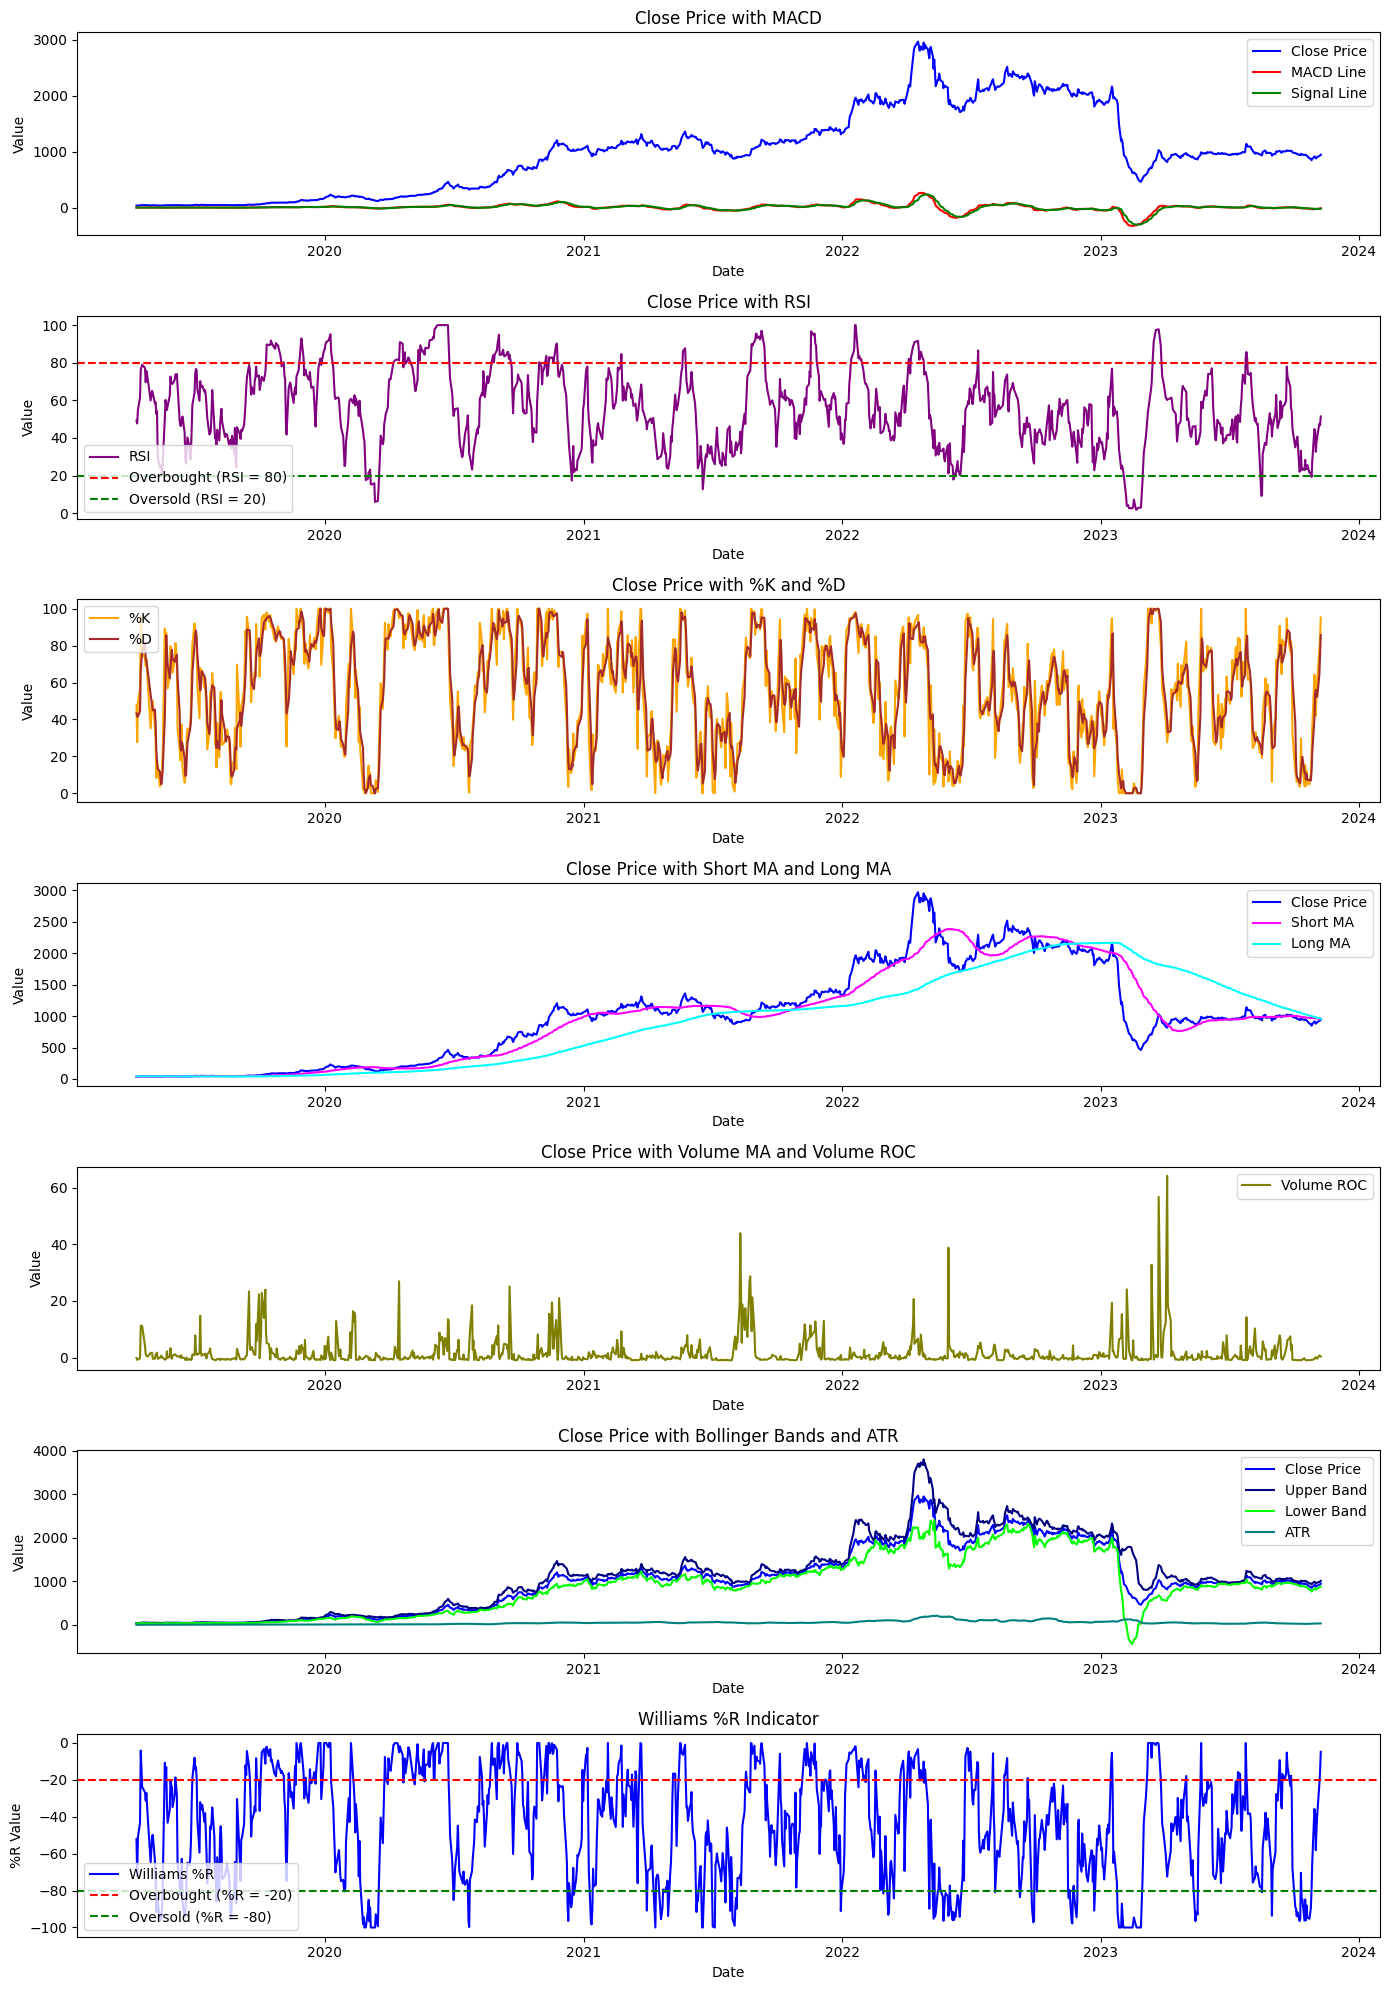

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume 'recent_data' DataFrame contains the necessary columns including Close price and the calculated indicators

# Plotting
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20))

# 1) Close price with MACD Line, Signal Line, and MACD Histogram
axs[0].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[0].plot(recent_data.index, recent_data['MACD_Line'], label='MACD Line', color='red')
axs[0].plot(recent_data.index, recent_data['Signal_Line'], label='Signal Line', color='green')
# axs[0].bar(recent_data.index, recent_data['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
axs[0].set_title('Close Price with MACD')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Value')
axs[0].legend()

# 2) Close price with RSI

# axs[1].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[1].plot(recent_data.index, recent_data['RSI'], label='RSI', color='purple')

# Add horizontal lines for overbought and oversold conditions
axs[1].axhline(y=80, color='red', linestyle='--', label='Overbought (RSI = 80)')
axs[1].axhline(y=20, color='green', linestyle='--', label='Oversold (RSI = 20)')

axs[1].set_title('Close Price with RSI')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].legend()

# 3) Close price with %K and %D
# axs[2].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[2].plot(recent_data.index, recent_data['%K'], label='%K', color='orange')
axs[2].plot(recent_data.index, recent_data['%D'], label='%D', color='brown')
axs[2].set_title('Close Price with %K and %D')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Value')
axs[2].legend()

# 4) Close price with Short MA and Long MA
axs[3].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[3].plot(recent_data.index, recent_data['Short_MA'], label='Short MA', color='magenta')
axs[3].plot(recent_data.index, recent_data['Long_MA'], label='Long MA', color='cyan')
axs[3].set_title('Close Price with Short MA and Long MA')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Value')
axs[3].legend()

# 5) Close price with Volume MA and Volume ROC
# axs[4].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
# axs[4].plot(recent_data.index, recent_data['Volume_MA'], label='Volume MA', color='pink')
axs[4].plot(recent_data.index, recent_data['Volume_ROC'], label='Volume ROC', color='olive')
axs[4].set_title('Close Price with Volume MA and Volume ROC')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Value')
axs[4].legend()

# 6) Close price with Upper Band, Lower Band, and ATR
axs[5].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[5].plot(recent_data.index, recent_data['Upper_Band'], label='Upper Band', color='navy')
axs[5].plot(recent_data.index, recent_data['Lower_Band'], label='Lower Band', color='lime')
axs[5].plot(recent_data.index, recent_data['ATR'], label='ATR', color='teal')
axs[5].set_title('Close Price with Bollinger Bands and ATR')
axs[5].set_xlabel('Date')
axs[5].set_ylabel('Value')
axs[5].legend()


# Plotting Williams %R
axs[6].plot(recent_data.index, recent_data['%R'], label='Williams %R', color='blue')
axs[6].axhline(y=-20, color='red', linestyle='--', label='Overbought (%R = -20)')
axs[6].axhline(y=-80, color='green', linestyle='--', label='Oversold (%R = -80)')
axs[6].set_title('Williams %R Indicator')
axs[6].set_xlabel('Date')
axs[6].set_ylabel('%R Value')
axs[6].legend()
# axs[6].grid(True)


plt.tight_layout()
plt.show()


cross section for macd and signal line

In [99]:
import pandas as pd
import numpy as np

# Assume 'recent_data' DataFrame contains the necessary columns including Close price, MACD_Line, Signal_Line, and Price_Move

# Initialize lists to store labels and targets
above_labels = []
below_labels = []
above_targets = []
below_targets = []

# Identify crossover points
for i in range(1, len(recent_data)):
    if recent_data['MACD_Line'][i] > recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] <= recent_data['Signal_Line'][i - 1]:
        above_labels.append('MACD Line crossed above Signal Line')
        above_targets.append(recent_data['Price_Move'][i])
    elif recent_data['MACD_Line'][i] < recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] >= recent_data['Signal_Line'][i - 1]:
        below_labels.append('MACD Line crossed below Signal Line')
        below_targets.append(recent_data['Price_Move'][i])



In [100]:
# Filter targets for label 1 occurrences in crosses above
percent_above_label_1 = (above_targets.count(1) / len(above_targets)) * 100
# Filter targets for label -1 occurrences in crosses below
percent_below_label_minus_1 = (below_targets.count(-1) / len(below_targets)) * 100

print(f"Percentage of label 1 occurrences in above target: {percent_above_label_1:.2f}%")
print(f"Percentage of label -1 occurrences in below target: {percent_below_label_minus_1:.2f}%")
print("Number of samples {:.2f}%".format((len(above_targets) + len(below_targets)) / recent_data.shape[0] * 100))


Percentage of label 1 occurrences in above target: 40.00%
Percentage of label -1 occurrences in below target: 55.88%
Number of samples 6.08%


In [101]:
# Assuming 'macd_line' and 'signal_line' are lists containing MACD line and signal line values
# Assuming 'crossed' is a boolean indicating whether the MACD line and signal line have crossed or not

# Define targets for label 1 (Up Wave) and label -1 (Down Wave)
targets = []  # Initialize empty list for targets
for i in range(len(macd_line)):
    if macd_line[i] > signal_line[i]:
        targets.append(1)  # Label 1 for MACD line above signal line (Up Wave)
    elif macd_line[i] < signal_line[i]:
        targets.append(-1)  # Label -1 for MACD line below signal line (Down Wave)
    else:
        targets.append(0)  # Label 0 for no cross

# Filter targets based on whether the MACD line and signal line have crossed or not
not_crossed_targets = [target for target in targets if target == 1 or target == -1]

# Calculate the percentages of label 1 and label -1 occurrences in the filtered targets
percent_label_1 = (not_crossed_targets.count(1) / len(not_crossed_targets)) * 100
percent_label_minus_1 = (not_crossed_targets.count(-1) / len(not_crossed_targets)) * 100

print(f"Percentage of label 1 occurrences when MACD line and signal line do not cross: {percent_label_1:.2f}%")
print(f"Percentage of label -1 occurrences when MACD line and signal line do not cross: {percent_label_minus_1:.2f}%")


Percentage of label 1 occurrences when MACD line and signal line do not cross: 47.88%
Percentage of label -1 occurrences when MACD line and signal line do not cross: 52.12%


rsi value crosschecking

In [102]:
# Initialize counters
overbought_count = 0
oversold_count = 0
total_overbought = 0
total_oversold = 0

# Iterate through the DataFrame
for index, row in recent_data.iterrows():
    if row['RSI'] > 80:
        total_overbought += 1
        if row['Price_Move'] == 1:
            overbought_count += 1
    elif row['RSI'] < 20:
        total_oversold += 1
        if row['Price_Move'] == -1:
            oversold_count += 1

# Calculate percentages
overbought_percentage = (overbought_count / total_overbought) * 100 if total_overbought > 0 else 0
oversold_percentage = (oversold_count / total_oversold) * 100 if total_oversold > 0 else 0

print("Percentage of movement being 1 when RSI is above 80:", overbought_percentage)
print("Percentage of movement being -1 when RSI is below 20:", oversold_percentage)
print("Number of samples: {:.2f}%".format((total_overbought + total_oversold) / recent_data.shape[0] * 100))


Percentage of movement being 1 when RSI is above 80: 70.9090909090909
Percentage of movement being -1 when RSI is below 20: 62.857142857142854
Number of samples: 17.64%


In [103]:
import pandas as pd

# Define the bins for RSI values
bins = [0, 20, 50, 80, 100]

# Define the labels for the bins
labels = ['<20', '20-50', '50-80', '>80']

# Create a new column 'RSI_Bin' to categorize RSI values into bins
recent_data['RSI_Bin'] = pd.cut(recent_data['RSI'], bins=bins, labels=labels, right=False)

# Group by 'RSI_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['RSI_Bin', 'Price_Move']).size() / recent_data.groupby('RSI_Bin').size() * 100

# Print the results
print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
RSI_Bin  Price_Move
<20      -1            62.857143
          1            37.142857
20-50    -1            49.299065
          1            50.700935
50-80    -1            45.454545
          1            54.545455
>80      -1            29.139073
          1            70.860927
dtype: float64


%k and %d

In [104]:
# Calculate percentage of 1s and -1s when %K is higher than %D and when %K is lower than %D
def calculate_percentage(recent_data):
    # Filter rows where %K is higher than %D
    bullish_df = recent_data[recent_data['%K'] > recent_data['%D']]

    # Calculate percentage of 1s in price_move when %K is higher than %D
    bullish_percentage = (bullish_df['Price_Move'] == 1).sum() / len(bullish_df) * 100

    # Filter rows where %K is lower than %D
    bearish_df = recent_data[recent_data['%K'] < recent_data['%D']]

    # Calculate percentage of -1s in price_move when %K is lower than %D
    bearish_percentage = (bearish_df['Price_Move'] == -1).sum() / len(bearish_df) * 100
    print("number od samples " + str(len(bullish_df)+len(bearish_df)))
    return bullish_percentage, bearish_percentage

# Example usage
bullish_percentage, bearish_percentage = calculate_percentage(recent_data)
print("Percentage of 1s when %K > %D:", bullish_percentage)
print("Percentage of -1s when %K < %D:", bearish_percentage)


number od samples 1110
Percentage of 1s when %K > %D: 56.41476274165203
Percentage of -1s when %K < %D: 46.02587800369686


bollinger band

In [105]:
print(recent_data.columns)

# Function to analyze the effectiveness of volatility indicators
def analyze_volatility_indicators(data, threshold=15):
    # Calculate volatility indicators
    upper_band, lower_band, atr = calculate_volatility_indicators(data)

    # Calculate the difference between close price and upper/lower bands
    diff_upper = data['Close'] - upper_band.shift(-1)
    diff_lower = lower_band.shift(-1) - data['Close']

    # Check conditions based on the threshold
    condition_1 = diff_upper > threshold
    condition_minus_1 = diff_lower > threshold

    # Count occurrences of 1 and -1 based on conditions
    count_1 = data.loc[condition_1, 'Price_Move'].sum()
    count_minus_1 = data.loc[condition_minus_1, 'Price_Move'].sum()

    # Calculate total occurrences
    total_1 = condition_1.sum()
    total_minus_1 = condition_minus_1.sum()

    # Compute percentages
    percentage_1 = (count_1 / total_1) * 100
    percentage_minus_1 = (count_minus_1 / total_minus_1) * 100

    return percentage_1, percentage_minus_1

# Analyze the effectiveness of volatility indicators
percentage_1, percentage_minus_1 = analyze_volatility_indicators(recent_data)

# Print results
print(f"Percentage of 1s when price moves above Upper Band: {percentage_1:.2f}%")
print(f"Percentage of -1s when price moves below Lower Band: {percentage_minus_1:.2f}%")

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD_Line', 'Signal_Line',
       'MACD_Histogram', 'RSI', '%K', '%D', 'Short_MA', 'Long_MA', 'Volume_MA',
       'Volume_ROC', 'Upper_Band', 'Lower_Band', 'ATR', '%R',
       'Next_5_Days_Avg_Diff', 'Price_Move', 'Signal', 'RSI_Bin'],
      dtype='object')
Percentage of 1s when price moves above Upper Band: -100.00%
Percentage of -1s when price moves below Lower Band: 100.00%


In [106]:
import pandas as pd
import numpy as np

# Function to generate trading signals and calculate percentages
def generate_signals(data, window=20, deviation=2):
    # Calculate Bollinger Bands
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + deviation * rolling_std
    lower_band = rolling_mean - deviation * rolling_std

    # Initialize signal column
    data['Custom_Signal'] = 0

    # Generate signals
    for i in range(1, len(data)):
        if data['Close'][i] > upper_band[i-1]:
            data['Custom_Signal'][i] = 1  # Buy signal (price above upper band)
        elif data['Close'][i] < lower_band[i-1]:
            data['Custom_Signal'][i] = -1  # Sell signal (price below lower band)

    # Calculate percentages
    total_signals = len(data)
    count_buy_signals = data[data['Custom_Signal'] == 1]['Custom_Signal'].count()
    count_sell_signals = data[data['Custom_Signal'] == -1]['Custom_Signal'].count()
    percentage_buy_signals = (count_buy_signals / total_signals) * 100
    percentage_sell_signals = (count_sell_signals / total_signals) * 100

    return data, percentage_buy_signals, percentage_sell_signals

# Sample data (replace this with your own data)
# recent_data = ...

# Generate signals and calculate percentages
recent_data, percentage_buy, percentage_sell = generate_signals(recent_data)

# Print percentages
print(f"Percentage of Buy Signals (1s): {percentage_buy:.2f}%")
print(f"Percentage of Sell Signals (-1s): {percentage_sell:.2f}%")


Percentage of Buy Signals (1s): 15.52%
Percentage of Sell Signals (-1s): 4.85%


%r

In [107]:
import pandas as pd

# Define the bins for %R Williams values
bins = [-100, -80, -50, -20, 0]

# Define the labels for the bins
labels = ['<-80', '-80 to -50', '-50 to -20', '> -20']

# Create a new column '%R_Bin' to categorize %R Williams values into bins
recent_data['%R_Bin'] = pd.cut(recent_data['%R'], bins=bins, labels=labels, right=False)

# Group by '%R_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['%R_Bin', 'Price_Move']).size() / recent_data.groupby('%R_Bin').size() * 100

# Print the results
print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
%R_Bin      Price_Move
<-80        -1            54.320988
             1            45.679012
-80 to -50  -1            47.682119
             1            52.317881
-50 to -20  -1            48.087432
             1            51.912568
> -20       -1            35.271318
             1            64.728682
dtype: float64


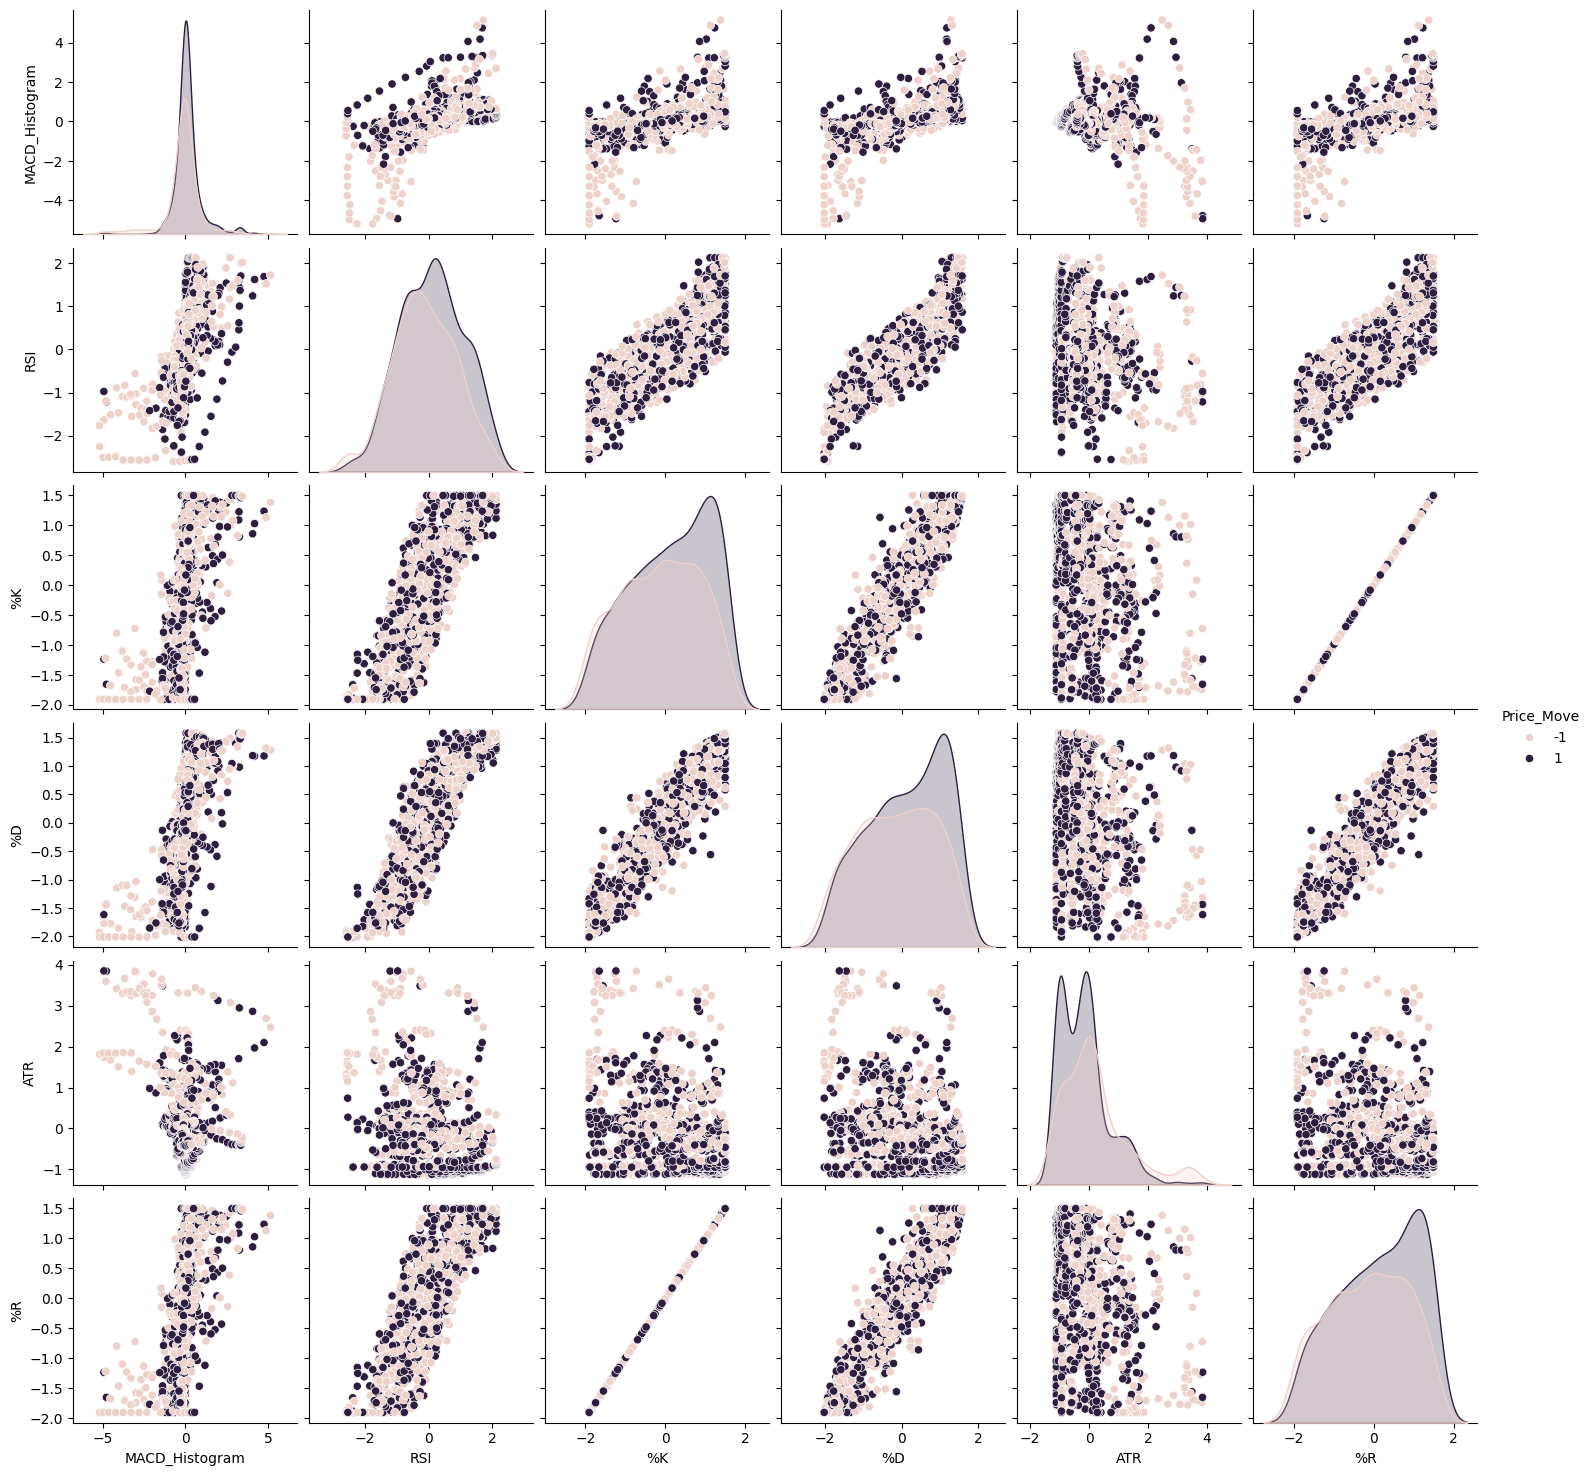

In [108]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Extract the features to be normalized
features_to_normalize = ['MACD_Histogram', 'RSI', '%K', '%D', 'ATR', '%R']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the selected features
normalized_features = scaler.fit_transform(recent_data[features_to_normalize])

# Replace the original features with the normalized ones in your dataset
recent_data[features_to_normalize] = normalized_features
normalized_data=recent_data[features_to_normalize] 
# Add 'price_move' to the DataFrame of normalized features
normalized_data['Price_Move'] = recent_data['Price_Move']

# Create pairwise plots
sns.pairplot(normalized_data, hue='Price_Move', diag_kind='kde')
plt.show()

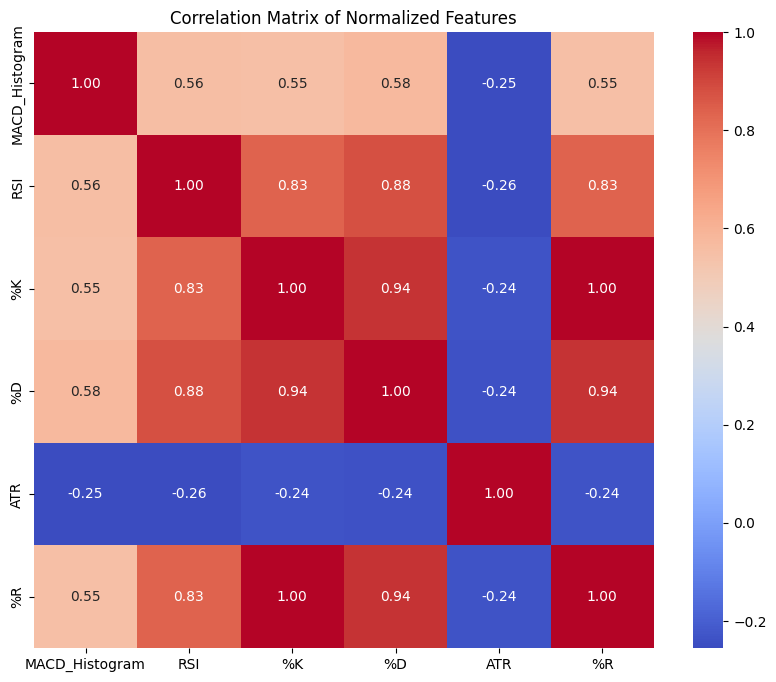

In [109]:
# Compute the correlation matrix
non_tar_data=normalized_data.drop('Price_Move',axis=1)
correlation_matrix = non_tar_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Normalized Features')
plt.show()


In [110]:
# # Calculate correlation matrix
# correlation_matrix = normalized_features_df.corr()

# # Plot heatmap of correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()
# # 0-0.3 weak correlation , 0.3-0.7 modeate correlation , 0.7-1 strong relation 

In [111]:
print(recent_data)

                  Open        High         Low       Close    Volume  \
Date                                                                   
2019-04-10   36.900002   38.099998   36.349998   36.950001    446323   
2019-04-11   37.000000   37.299999   35.700001   36.000000    592636   
2019-04-12   36.349998   37.450001   36.200001   37.000000    716786   
2019-04-15   37.299999   37.750000   37.150002   37.450001    598604   
2019-04-16   37.599998   44.900002   37.599998   44.500000  10783405   
...                ...         ...         ...         ...       ...   
2023-11-02  894.000000  912.950012  884.000000  892.099976    510410   
2023-11-03  898.950012  907.299988  897.000000  902.700012    286930   
2023-11-06  909.900024  929.799988  908.000000  926.500000    619386   
2023-11-07  934.700012  953.250000  916.849976  932.150024    919787   
2023-11-08  934.950012  950.599976  932.000000  946.650024    492815   

            MACD_Line  Signal_Line  MACD_Histogram       RSI   

### Classifier

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import accuracy_score

features = ['MACD_Histogram', 'RSI', '%K', '%D', '%R']

X = recent_data[features]
y = recent_data['Price_Move']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Initialize Random Forest classifier
# classifier = RandomForestClassifier()
# List of classifiers
# List of classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(),
    "Ridge": RidgeClassifier(),
    "Ridge CV": RidgeClassifierCV()
}

# slice=int(0.8*(len(X)))
slice_index=-50
X_train, X_test = X[:slice_index], X[slice_index:-1]
y_train, y_test = y[1:slice_index+1], y[slice_index+1:]
# X_train= X[:slice]
# y_train= y[:slice]
# X_test= X[slice:]
# y_test= y[slice:]
# Train the classifier on the training data
# classifier.fit(X_train, y_train)
# pred = []

# for i in range(int(len(X_test))):
#     #Convert DataFrame row to numpy array
#     x_test_instance = X_test.iloc[i].values.reshape(1, -1)
#     spred = classifier.predict(x_test_instance)
#     pred.append(spred)
#     X_train = np.append(X_train, x_test_instance, axis=0)
#     y_train = np.append(y_train, spred, axis=0)
#     classifier.fit(X_train,y_train)

# accuracy = accuracy_score(pred,y_test)

# print("Accuracy:", accuracy)
#  Train and evaluate each classifier
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test_scaled)
    pred = []
    for i in range(int(len(X_test))):
        #Convert DataFrame row to numpy array
        x_test_instance = X_test.iloc[i].values.reshape(1, -1)
        # y_test_instance = y_test.iloc[i].values.reshape(1, -1)
        spred = clf.predict(x_test_instance)
        pred.append(spred)
        X_train = np.append(X_train, x_test_instance, axis=0)
        y_train = np.append(y_train, y_test[i])
        clf.fit(X_train,y_train)

    # accuracy = accuracy_score(pred,y_test)

    # print("Accuracy:", accuracy)
    accuracies[name] = accuracy_score(pred,y_test)

# Print accuracies
for name, acc in accuracies.items():
    print(f"{name}: {acc}")


# # Make predictions on the testing data
# predict= classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, predict)
# print("Accuracy:", accuracy)

Decision Tree: 0.30612244897959184
Extra Tree: 1.0
Extra Trees: 1.0
KNeighbors: 1.0
Random Forest: 1.0
MLP: 0.4489795918367347
Ridge: 0.4489795918367347
Ridge CV: 0.46938775510204084


In [113]:
future_data[features]
future_predictions = classifier.predict(future_data[features])               

count = sum(future_predictions[i] == future_data['Price_Move'][i] for i in range(len(future_predictions)))
print(count/future_data.shape[0])

0.49


In [114]:
# Reset warnings to default behavior
warnings.resetwarnings()